# Loading Tables from Database into DataFrames

In [148]:
import psycopg2
import pandas as pd

# Database connection details
DB_HOST = "restaurantdb.c3ka6a2sic3o.us-east-2.rds.amazonaws.com"
DB_PORT = 5432
DB_NAME = "postgres"
DB_USER = "aditisirohi"
DB_PASSWORD = "****"

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD
)

# Load each table into a separate DataFrame
restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
hours_df = pd.read_sql_query("SELECT * FROM hours", conn)
transactions_df = pd.read_sql_query("SELECT * FROM transactions", conn)
reviews_df = pd.read_sql_query("SELECT * FROM reviews", conn)
categories_df = pd.read_sql_query("SELECT * FROM categories", conn)

# Close the connection
conn.close()


/var/folders/7j/t2wp987d3kj55xd3v658c6m00000gn/T/ipykernel_67443/102894043.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
/var/folders/7j/t2wp987d3kj55xd3v658c6m00000gn/T/ipykernel_67443/102894043.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hours_df = pd.read_sql_query("SELECT * FROM hours", conn)
/var/folders/7j/t2wp987d3kj55xd3v658c6m00000gn/T/ipykernel_67443/102894043.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df =

# Displaying All Dataframes

In [183]:
print(restaurants_df.columns)
print(hours_df.columns)
print(transactions_df.columns)
print(reviews_df.columns)
print(categories_df.columns)

Index(['restaurant_id', 'neighborhood', 'restaurant_name', 'address',
       'rating_google', 'rating_yelp', 'review_count_google',
       'review_count_yelp', 'latitude', 'longitude', 'menu_url', 'is_closed',
       'cuisine'],
      dtype='object')
Index(['hour_id', 'restaurant_id', 'weekday', 'opening_hours',
       'closing_hours'],
      dtype='object')
Index(['transaction_id', 'restaurant_id', 'transaction_type'], dtype='object')
Index(['review_id', 'restaurant_id', 'review_text', 'review_rating',
       'sentiment_score', 'sentiment_category', 'rating_google',
       'rating_category'],
      dtype='object')
Index(['category_id', 'restaurant_id', 'category_name'], dtype='object')


In [149]:
# Display DataFrames
print("Restaurants DataFrame")
restaurants_df.head()

Restaurants DataFrame


,restaurant_id,neighborhood,restaurant_name,address,rating_google,rating_yelp,review_count_google,review_count_yelp,latitude,longitude,menu_url,is_closed,cuisine
0,1,West Village,Artichoke Basille's Pizza,"111 MacDougal St, New York, NY 10012, USA",4.4,3.6,1861,989,40.730000,-74.000728,https://www.yelp.com/biz/artichoke-basilles-pi...,False,Pizza
1,2,West Village,Magnolia Bakery,"401 Bleecker St, New York, NY 10014, USA",4.3,3.2,4401,2700,40.735889,-74.004954,https://www.yelp.com/biz/magnolia-bakery-new-y...,False,bakery
2,3,West Village,Blue Note,"131 W 3rd St, New York, NY 10012, USA",4.3,3.0,4825,614,40.730908,-74.000656,https://www.yelp.com/biz/blue-note-new-york-ne...,False,American
3,4,West Village,Dos Caminos,"675 Hudson St, New York, NY 10014, USA",4.0,3.2,2461,1267,40.740433,-74.005475,https://www.yelp.com/biz/dos-caminos-new-york-...,False,Mexican
4,5,West Village,Babbo,"110 Waverly Pl, New York, NY 10011, USA",4.3,3.8,1668,2703,40.732296,-73.999279,https://www.yelp.com/biz/babbo-new-york?adjust...,False,Italian


In [150]:
print("Hours DataFrame")
hours_df.head()

Hours DataFrame


,hour_id,restaurant_id,weekday,opening_hours,closing_hours
0,1,1,Monday,11:00:00,04:00:00
1,2,1,Tuesday,11:00:00,04:00:00
2,3,1,Wednesday,11:00:00,04:00:00
3,4,1,Thursday,11:00:00,04:00:00
4,5,1,Friday,11:00:00,04:00:00


In [151]:
print("Transactions DataFrame")
transactions_df.head()

Transactions DataFrame


,transaction_id,restaurant_id,transaction_type
0,1,1,delivery
1,2,1,pickup
2,3,2,pickup
3,4,2,delivery
4,5,4,pickup


In [152]:
print("Reviews DataFrame")
reviews_df.head()

Reviews DataFrame


,review_id,restaurant_id,review_text,review_rating
0,1,1,You know when people said “Try Artichoke Basil...,5
1,2,1,I had one artichoke pizza for lunch and a crab...,5
2,3,1,Second time visiting Artichoke Basille's Pizza...,5
3,4,1,Artichoke Pizza in Greenwich Village is a slic...,5
4,5,1,Best pizza in nyc.\n\nThis place has the most ...,5


In [153]:
print("Categories DataFrame")
categories_df.head()

Categories DataFrame


,category_id,restaurant_id,category_name
0,1,1,Pizza
1,2,2,Bakeries
2,3,2,Desserts
3,4,2,Cupcakes
4,5,3,Jazz & Blues


# Summary Statistics

In [154]:
# Summary statistics for ratings and review counts
google_rating_summary = restaurants_df["rating_google"].describe()
yelp_rating_summary = restaurants_df["rating_yelp"].describe()
google_review_count_summary = restaurants_df["review_count_google"].describe()
yelp_review_count_summary = restaurants_df["review_count_yelp"].describe()

print("Google Ratings Summary:\n", google_rating_summary, "\n")
print("Yelp Ratings Summary:\n", yelp_rating_summary, "\n")
print("Google Review Count Summary:\n", google_review_count_summary, "\n")
print("Yelp Review Count Summary:\n", yelp_review_count_summary, "\n")

# Correlation between ratings and review counts
correlations = restaurants_df[[
    "rating_google", "rating_yelp", "review_count_google", "review_count_yelp"
]].corr()

print("Correlation Matrix:\n", correlations, "\n")

# Relevant columns to display
relevant_columns = [ 
    "restaurant_id", "restaurant_name", "neighborhood", "rating_google", "review_count_google",
    "rating_yelp", "review_count_yelp", "address", "cuisine"
]

# Identifying restaurants with extreme ratings
highest_rated_google = restaurants_df[restaurants_df["rating_google"] == restaurants_df["rating_google"].max()][relevant_columns]
lowest_rated_google = restaurants_df[restaurants_df["rating_google"] == restaurants_df["rating_google"].min()][relevant_columns]
highest_rated_yelp = restaurants_df[restaurants_df["rating_yelp"] == restaurants_df["rating_yelp"].max()][relevant_columns]
lowest_rated_yelp = restaurants_df[restaurants_df["rating_yelp"] == restaurants_df["rating_yelp"].min()][relevant_columns]

print("Highest Rated Restaurant on Google:\n", highest_rated_google, "\n")
print("Lowest Rated Restaurant on Google:\n", lowest_rated_google, "\n")
print("Highest Rated Restaurant on Yelp:\n", highest_rated_yelp, "\n")
print("Lowest Rated Restaurant on Yelp:\n", lowest_rated_yelp, "\n")


Google Ratings Summary:
 count    350.000000
mean       4.292000
std        0.254684
min        2.900000
25%        4.200000
50%        4.300000
75%        4.500000
max        4.800000
Name: rating_google, dtype: float64 

Yelp Ratings Summary:
 count    350.000000
mean       3.690000
std        0.490117
min        0.000000
25%        3.500000
50%        3.800000
75%        4.000000
max        4.800000
Name: rating_yelp, dtype: float64 

Google Review Count Summary:
 count      350.000000
mean      2348.637143
std       2994.133097
min          7.000000
25%        772.500000
50%       1411.000000
75%       2582.500000
max      26114.000000
Name: review_count_google, dtype: float64 

Yelp Review Count Summary:
 count     350.000000
mean     1139.674286
std      1042.389209
min         0.000000
25%       448.250000
50%       883.000000
75%      1519.750000
max      6733.000000
Name: review_count_yelp, dtype: float64 

Correlation Matrix:
                      rating_google  rating_yelp  

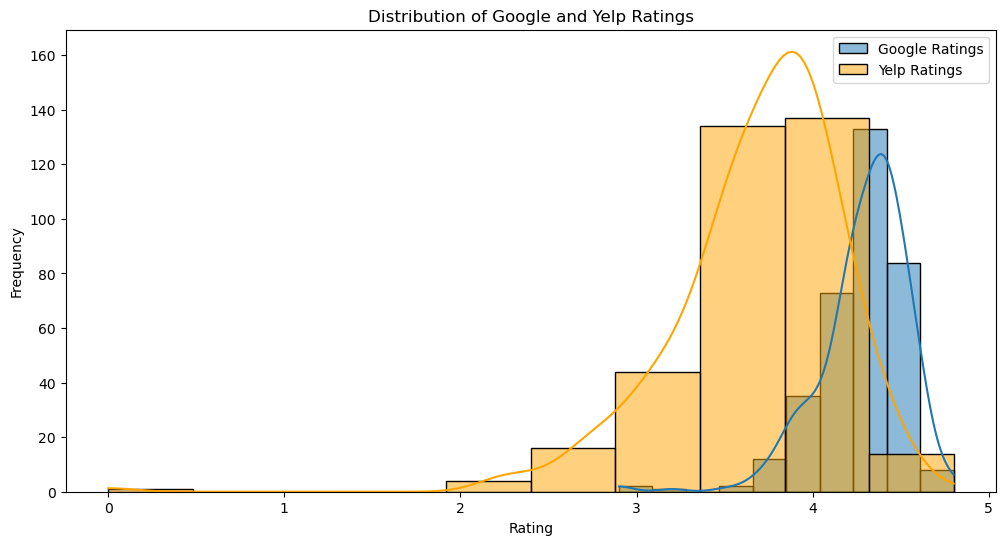

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Google and Yelp ratings
plt.figure(figsize=(12, 6))
sns.histplot(restaurants_df["rating_google"], bins=10, kde=True, label="Google Ratings")
sns.histplot(restaurants_df["rating_yelp"], bins=10, kde=True, label="Yelp Ratings", color="orange")
plt.title("Distribution of Google and Yelp Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Most of the ratings are distributed between 3.5 - 4.5 across both google and yelp ratings

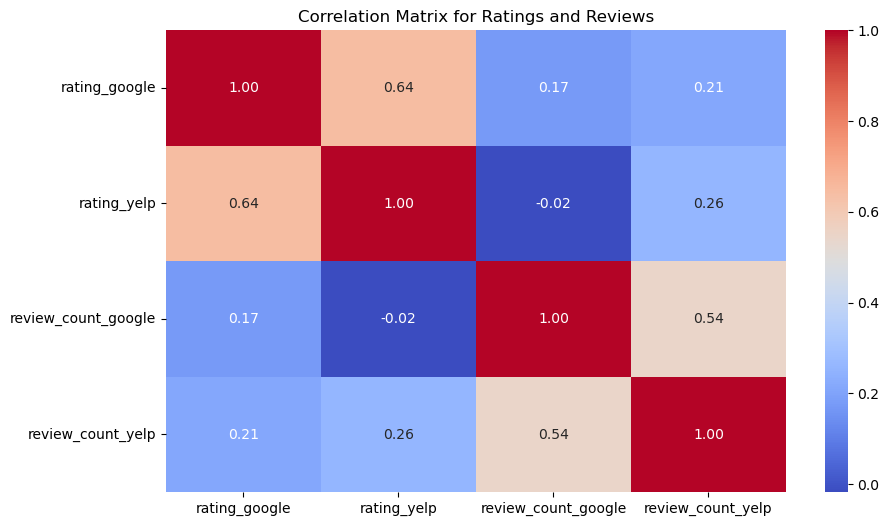

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

restaurants_combined = pd.merge(
    restaurants_df,
    categories_df.groupby("restaurant_id")["category_name"].apply(list).reset_index(),
    on="restaurant_id",
    how="left"
)

correlation_matrix = restaurants_combined[[
    "rating_google", "rating_yelp", "review_count_google", "review_count_yelp"
]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Ratings and Reviews")
plt.show()

According to the correlation matrix, a higher review count does not correlate directly with a high rating for a restaurant across both yelp and google. However, there is a high correlation between google rating and yelp rating, so the restaurants are similarly rated on both platforms. The correlation between the google review count and yelp review count is also somewhat high, so the review counts for a restaurant on both platforms are also similar.

1. Google Ratings and Yelp Ratings (Correlation: ~0.64)  
There is a moderately positive correlation between Google and Yelp ratings.  
This suggests that restaurants generally tend to have similar ratings across both platforms, but differences in rating scales or user bases may contribute to the moderate rather than strong correlation.
2. Review Counts on Google and Yelp (Correlation: ~0.54)  
There is a moderate positive correlation between the number of reviews on Google and Yelp.  
This indicates that popular restaurants on one platform are likely to have a strong presence on the other, although not always.
3. Google Ratings and Google Review Counts (Correlation: ~0.17)  
The weak positive correlation suggests that higher ratings on Google do not strongly correspond to the number of reviews a restaurant receives.  
Restaurants with many reviews might be popular but not necessarily highly rated.
4. Yelp Ratings and Yelp Review Counts (Correlation: ~0.26)  
Similarly, the weak positive correlation here indicates that the number of Yelp reviews has only a slight relationship with the restaurant's average rating.  
High review counts on Yelp might reflect a larger customer base or longevity but do not guarantee higher ratings.
5. Cross-Platform Trends (Ratings vs. Review Counts)  
The correlations between rating_google and review_count_yelp or rating_yelp and review_count_google are negligible or weak.  
This suggests that there is minimal cross-platform influence between the number of reviews and ratings.

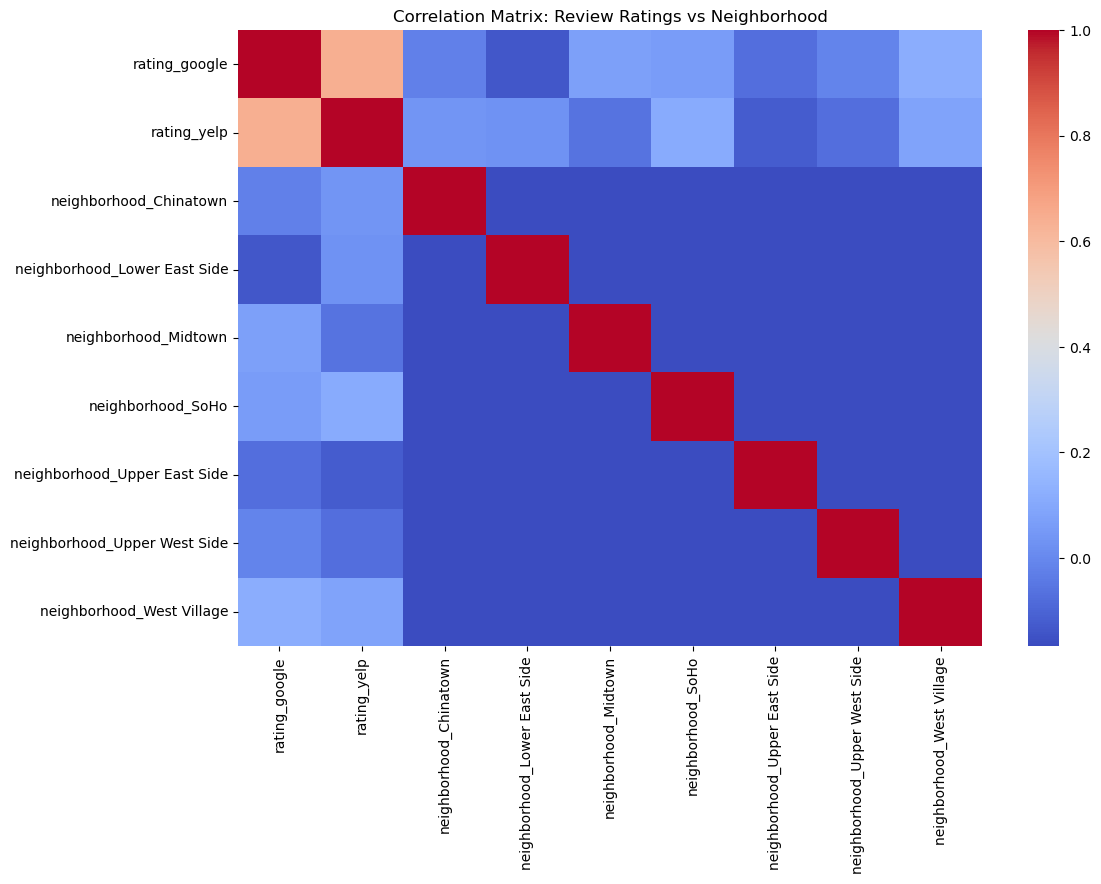

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# One-Hot Encoding for cuisine and neighborhood
restaurants_with_dummies = pd.concat([
    restaurants_df,
    pd.get_dummies(restaurants_df['cuisine'], prefix='cuisine'),
    pd.get_dummies(restaurants_df['neighborhood'], prefix='neighborhood')
], axis=1)


# Correlation Matrix: Review Ratings vs Neighborhood
neighborhood_columns = [col for col in restaurants_with_dummies.columns if col.startswith('neighborhood_')]
neighborhood_rating_corr = restaurants_with_dummies[['rating_google', 'rating_yelp'] + neighborhood_columns].corr()

def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title(title)
    plt.show()

plot_heatmap(neighborhood_rating_corr, "Correlation Matrix: Review Ratings vs Neighborhood")


There is no strong correlation between ratings and neighborhoods. Restaurants in one neighborhood do not recieve higher ratings just because they are located in that certain location.

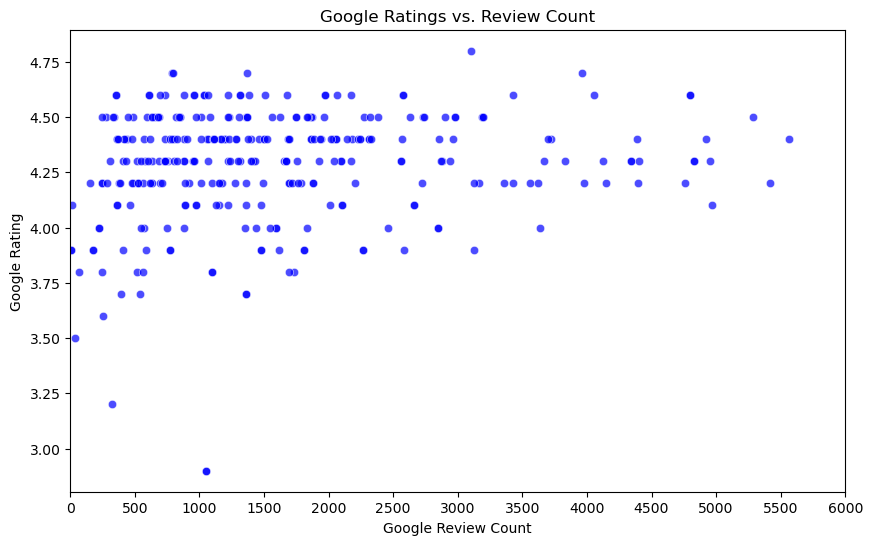

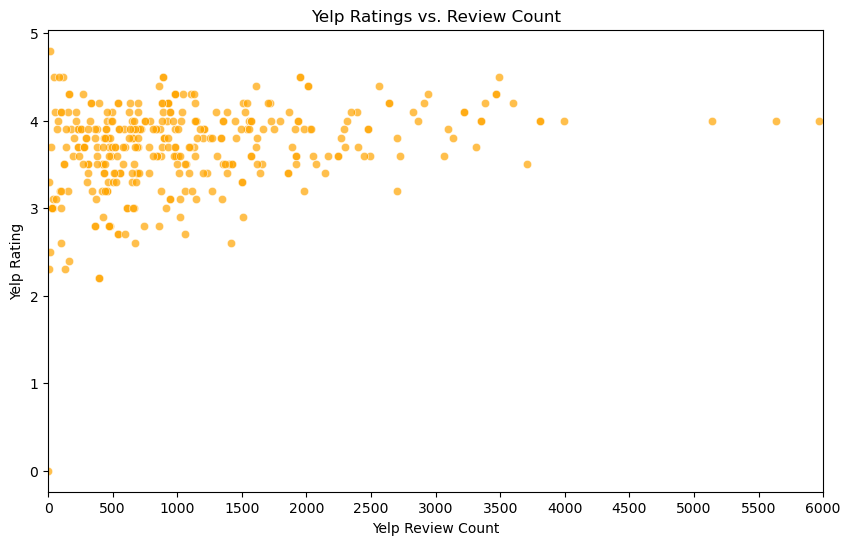

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for both Google and Yelp review counts <= 6,000
filtered_google_data = restaurants_df[restaurants_df["review_count_google"] <= 6000]
filtered_yelp_data = restaurants_df[restaurants_df["review_count_yelp"] <= 6000]

# Scatter plot for Google ratings vs review count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="review_count_google", 
    y="rating_google",
    data=filtered_google_data, 
    alpha=0.7, 
    color="blue"
)
plt.xlim(0, 6000)
plt.xticks(range(0, 6100, 500)) 
plt.title("Google Ratings vs. Review Count")
plt.xlabel("Google Review Count")
plt.ylabel("Google Rating")
plt.show()

# Scatter plot for Yelp ratings vs review count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="review_count_yelp", 
    y="rating_yelp",
    data=filtered_yelp_data, 
    alpha=0.7, 
    color="orange"
)
plt.xlim(0, 6000)
plt.xticks(range(0, 6100, 500)) 
plt.title("Yelp Ratings vs. Review Count")
plt.xlabel("Yelp Review Count")
plt.ylabel("Yelp Rating")
plt.show()


Google Ratings vs. Review Count  
Observations:  
Most restaurants have review counts below 2000, with a dense cluster around the 500-1500 range.  
Ratings seem to cluster between 4.0 and 4.5, with fewer restaurants below 3.5 or above 4.75.  
There is a slight upward trend indicating that higher review counts are loosely associated with slightly higher ratings.    

Conclusions:  
Google ratings for most restaurants are consistently high, regardless of the review count.  
Popular restaurants (higher review counts) tend to maintain a good rating (4.0+), suggesting that high popularity (via review count) often correlates with positive customer experiences.  
However, there are exceptions, as some restaurants with many reviews (~2000+) have ratings as low as 3.5, indicating that popularity doesn't always imply high ratings.  

Yelp Ratings vs. Review Count  
Observations:  
Yelp review counts are generally lower than Google review counts, with most restaurants having fewer than 1500 reviews.  
Ratings are more evenly spread between 3.0 and 4.5, suggesting more variability in customer satisfaction on Yelp compared to Google.  
There is no clear relationship between review count and ratings on Yelp; high ratings occur both for restaurants with few and many reviews.    

Conclusions:  
Yelp ratings tend to show more variability than Google ratings, which may reflect Yelp's more critical user base or different rating dynamics.  
High review counts on Yelp do not strongly correlate with higher ratings, as the scatter is fairly uniform.  
Restaurants with a smaller number of reviews (<500) can still achieve high ratings, indicating that Yelp users are not necessarily swayed by the popularity of a restaurant.  

                rating_google  rating_yelp
cuisine                                   
Vegan                4.525000     4.100000
dessert              4.466667     4.033333
Steak                4.460000     3.880000
French               4.433333     3.944444
Middle Eastern       4.433333     3.866667
Ethiopian            4.400000     3.900000
Ramen                4.400000     3.700000
Italian              4.380769     3.861538
Mediterranean        4.371429     4.085714
Bar                  4.370370     3.837037
Caribbean            4.366667     3.666667
Thai                 4.366667     3.833333
Cuban                4.350000     3.800000
Asian                4.350000     3.850000
Seafood              4.333333     3.566667
Japanese             4.320000     3.953333
bar                  4.312500     3.762500
Szechuan             4.300000     3.900000
bakery               4.300000     3.769231
Greek                4.300000     3.900000
Spanish              4.300000     3.850000
American   

<Figure size 1200x800 with 0 Axes>

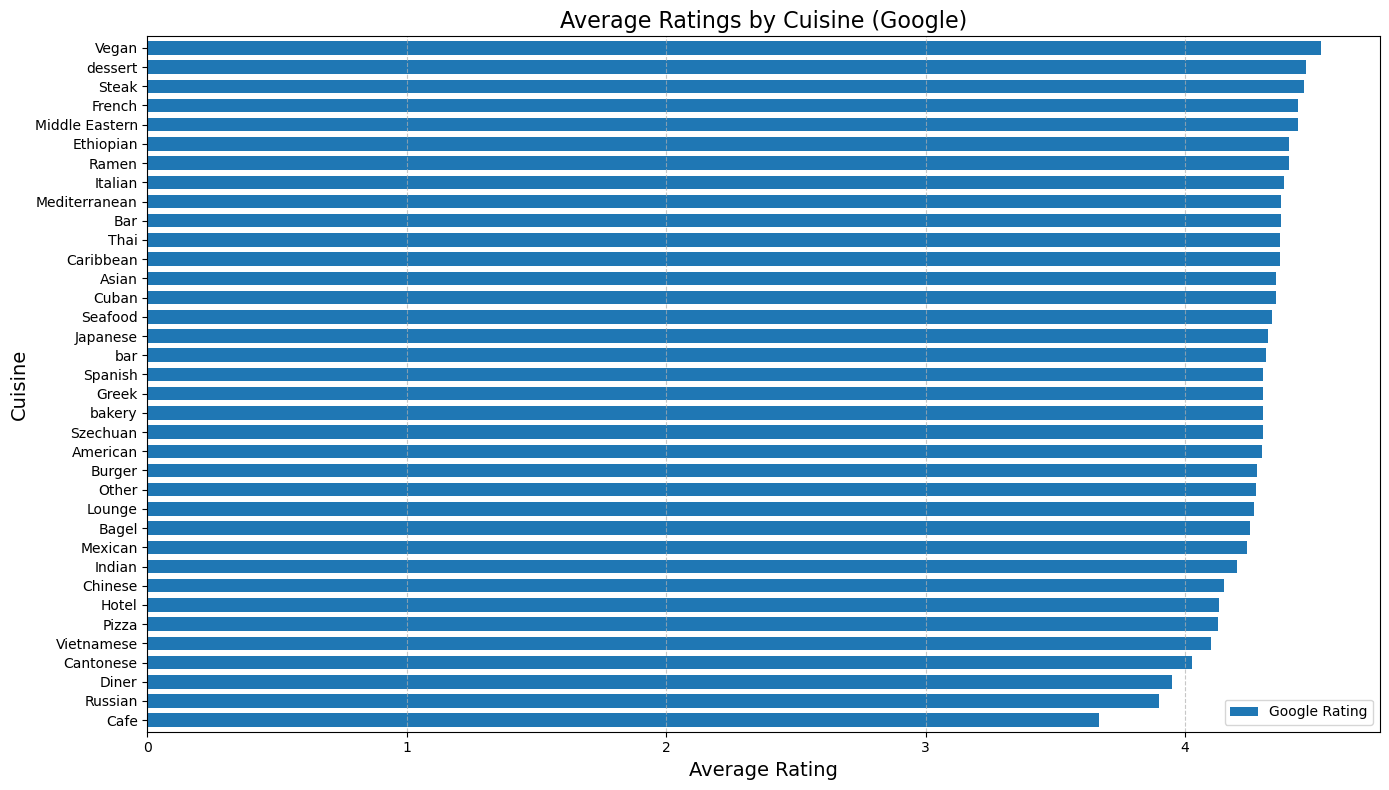

In [109]:
cuisine_ratings = restaurants_combined.groupby("cuisine")[["rating_google", "rating_yelp"]].mean()
print(cuisine_ratings.sort_values("rating_google", ascending=False))

import seaborn as sns
import matplotlib.pyplot as plt


cuisine_ratings = restaurants_combined.groupby("cuisine")[["rating_google"]].mean()

cuisine_ratings_sorted = cuisine_ratings.sort_values("rating_google", ascending=True)

plt.figure(figsize=(12, 8))

cuisine_ratings_sorted.plot(kind="barh", figsize=(14, 8), width=0.7)

plt.title("Average Ratings by Cuisine (Google)", fontsize=16)
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Cuisine", fontsize=14)
plt.legend(["Google Rating"], loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
cuisine_ratings = restaurants_combined.groupby("cuisine")[["rating_google", "rating_yelp"]].mean()
print(cuisine_ratings.sort_values("rating_google", ascending=False))

                rating_google  rating_yelp
cuisine                                   
Vegan                4.525000     4.100000
dessert              4.466667     4.033333
Steak                4.460000     3.880000
French               4.433333     3.944444
Middle Eastern       4.433333     3.866667
Ethiopian            4.400000     3.900000
Ramen                4.400000     3.700000
Italian              4.380769     3.861538
Mediterranean        4.371429     4.085714
Bar                  4.370370     3.837037
Caribbean            4.366667     3.666667
Thai                 4.366667     3.833333
Cuban                4.350000     3.800000
Asian                4.350000     3.850000
Seafood              4.333333     3.566667
Japanese             4.320000     3.953333
bar                  4.312500     3.762500
Szechuan             4.300000     3.900000
bakery               4.300000     3.769231
Greek                4.300000     3.900000
Spanish              4.300000     3.850000
American   

                 rating_google  rating_yelp
neighborhood                               
West Village             4.366        3.790
Midtown                  4.336        3.618
SoHo                     4.328        3.818
Upper West Side          4.284        3.604
Chinatown                4.278        3.734
Upper East Side          4.246        3.542
Lower East Side          4.206        3.724


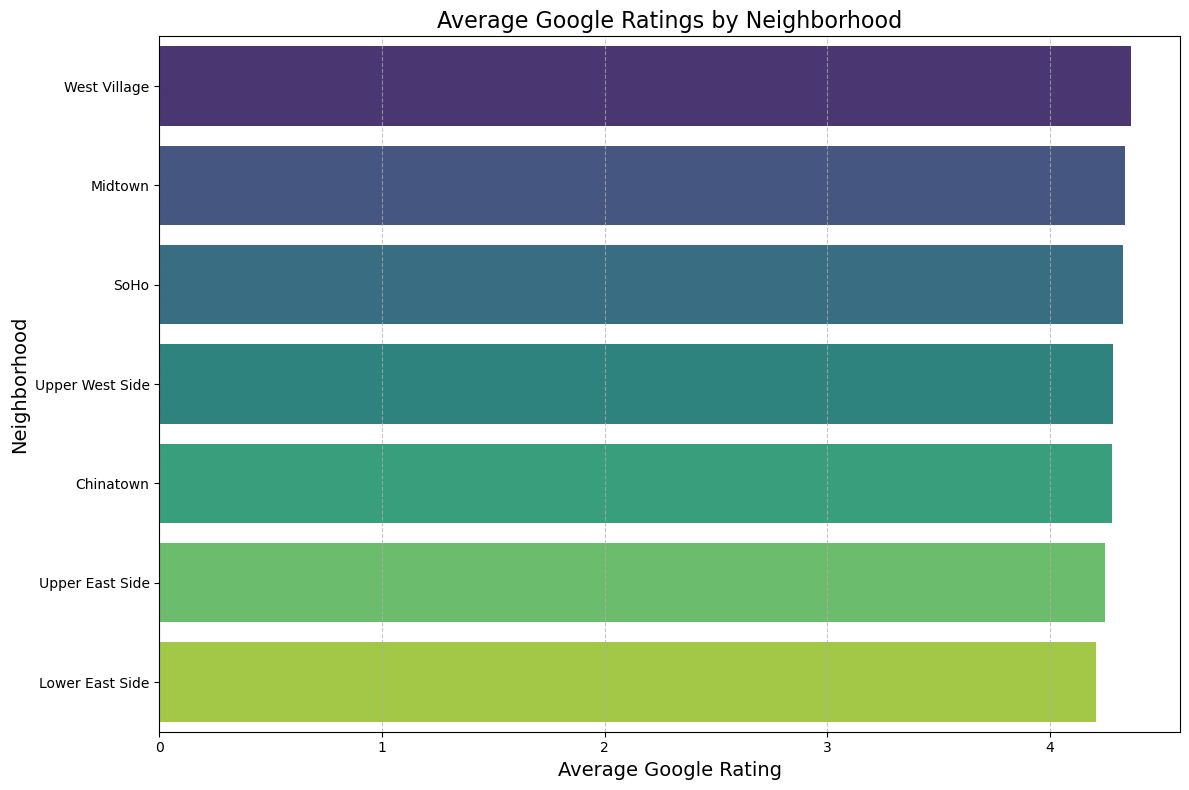

In [108]:
neighborhood_ratings = restaurants_combined.groupby("neighborhood")[["rating_google", "rating_yelp"]].mean()
print(neighborhood_ratings.sort_values("rating_google", ascending=False))

# Using google ratings for primary mode of anlaysis because:
# Higher Review Counts: More reviews make Google ratings statistically more robust.
# Consistency: Google ratings have less variance, leading to more stable insights for trend analysis.
# Population Representation: Google caters to a wider audience, providing more generalized insights.

import seaborn as sns
import matplotlib.pyplot as plt

neighborhood_ratings = restaurants_combined.groupby("neighborhood")[["rating_google", "rating_yelp"]].mean()

neighborhood_ratings_sorted = neighborhood_ratings.sort_values("rating_google", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=neighborhood_ratings_sorted["rating_google"],
    y=neighborhood_ratings_sorted.index,
    palette="viridis"
)

plt.title("Average Google Ratings by Neighborhood", fontsize=16)
plt.xlabel("Average Google Rating", fontsize=14)
plt.ylabel("Neighborhood", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [110]:
# Popularity by Cuisine (Ratings and Total Reviews Combined)
cuisine_popularity = restaurants_combined.groupby("cuisine").agg(
    avg_rating_google=("rating_google", "mean"),
    avg_rating_yelp=("rating_yelp", "mean"),
    total_reviews=("review_count_google", "sum")
).sort_values("total_reviews", ascending=False)

print(cuisine_popularity)

# There seems to be a slight trend where a lower number of reviews actually results in higher ratings. 
# Looking at the total reviews, the lower numbers are at the tope with many of the higher numbers being at the botton
# There is no set pattern, however as an influx of reviews come in for a certain cuisine, the rating may drop

# The cuisines which have the most reviews are American, Italian, Burger, Pizza, and Bakery. 
# The cuisines with the least number of reviews include, Vietnamese(1780), Indian(1761), Russian(1616), Greek(948), and Ethiopian(620)

                avg_rating_google  avg_rating_yelp  total_reviews
cuisine                                                          
American                 4.296296         3.590123         253309
Italian                  4.380769         3.861538         104874
Burger                   4.277778         3.588889          67699
Pizza                    4.125000         3.641667          46937
bakery                   4.300000         3.769231          42123
Bar                      4.370370         3.837037          36487
French                   4.433333         3.944444          35885
Mexican                  4.240000         3.513333          28951
Other                    4.273333         3.300000          28782
Hotel                    4.130000         3.360000          23892
Japanese                 4.320000         3.953333          13010
Cantonese                4.025000         3.350000          10964
Steak                    4.460000         3.880000          10793
dessert   

There seems to be a slight trend where a lower number of reviews actually results in higher ratings.   
Looking at the total reviews, the lower numbers are at the tope with many of the higher numbers being at the bottom   
There is no set pattern, however as an influx of reviews come in for a certain cuisine, the rating may drop  

The cuisines which have the most reviews are American(253309), Italian(104874), Burger(67699), Pizza(46937), Bakery(42123), and Bar(36487).   
This makes sense, since New York us really well known for its pizza, so if more people are trying the pizza, generally the places which serve Pizza as their main cuisine will have more reviews. The bar being up there also makes sense, since a lot of New Yorkers or even outsiders love going to new york to enjoy the night life there, and often a lot of those people may leave a review.    
The cuisines with the least number of reviews include, Vietnamese(1780), Indian(1761), Russian(1616), Greek(948), and Ethiopian(620).   

In [87]:
# Group by neighborhood and restaurant and calculate average ratings and total reviews
neighborhood_popularity = (
    restaurants_combined.groupby(["neighborhood", "restaurant_name"])
    .agg(
        avg_rating_google=("rating_google", "mean"),
        avg_rating_yelp=("rating_yelp", "mean"),
        total_reviews_google=("review_count_google", "sum"),
        total_reviews_yelp=("review_count_yelp", "sum"),
    )
    .reset_index()
)

# Sort by Google rating (highest to lowest)
neighborhood_popularity_sorted = (
    neighborhood_popularity.sort_values(["neighborhood", "avg_rating_google"], ascending=[True, False])
)

# Few top-rated restaurants from each neighborhood
sample_neighborhood_popularity = (
    neighborhood_popularity_sorted.groupby("neighborhood")
    .head(5)  
    .reset_index(drop=True)
)

sample_neighborhood_popularity


,neighborhood,restaurant_name,avg_rating_google,avg_rating_yelp,total_reviews_google,total_reviews_yelp
0,Chinatown,Casa D' Angelo - Nyc,4.6,4.1,3429,155
1,Chinatown,Dirt Candy,4.6,4.2,1311,883
2,Chinatown,Eileen's Special Cheesecake,4.6,4.4,2575,2015
3,Chinatown,Jadis,4.6,4.2,356,537
4,Chinatown,Rubirosa,4.6,4.3,4798,3469
5,Lower East Side,Essex Restaurant,4.8,3.7,7727,2397
6,Lower East Side,Cafe Himalaya,4.7,4.2,796,695
7,Lower East Side,Cafe Katja,4.7,4.4,788,860
8,Lower East Side,Dirt Candy,4.6,4.2,1311,883
9,Lower East Side,Jadis,4.6,4.2,356,537


In [88]:
# Group by neighborhood and cuisine to calculate average ratings
cuisine_neighborhood_analysis = (
    restaurants_combined.groupby(["neighborhood", "cuisine"])
    .agg(
        avg_rating_google=("rating_google", "mean"),
        avg_rating_yelp=("rating_yelp", "mean"),
        total_reviews_google=("review_count_google", "sum"),
        total_reviews_yelp=("review_count_yelp", "sum")
    )
    .reset_index()
)

# Sort the data to see best-performing cuisines in each neighborhood
cuisine_neighborhood_analysis_sorted = (
    cuisine_neighborhood_analysis.sort_values(["neighborhood", "avg_rating_google"], ascending=[True, False])
)

print(cuisine_neighborhood_analysis_sorted)


     neighborhood   cuisine  avg_rating_google  avg_rating_yelp  \
15      Chinatown     Vegan               4.60         4.200000   
9       Chinatown  Japanese               4.55         3.950000   
1       Chinatown     Asian               4.50         4.100000   
6       Chinatown    French               4.50         4.100000   
17      Chinatown    bakery               4.50         4.000000   
..            ...       ...                ...              ...   
120  West Village   Mexican               4.20         3.266667   
122  West Village     Other               4.20         3.300000   
124  West Village     Steak               4.20         3.400000   
112  West Village     Bagel               4.10         3.200000   
114  West Village    Burger               4.10         2.800000   

     total_reviews_google  total_reviews_yelp  
15                   1311                 883  
9                    1053                1172  
1                     596                 695  
6  

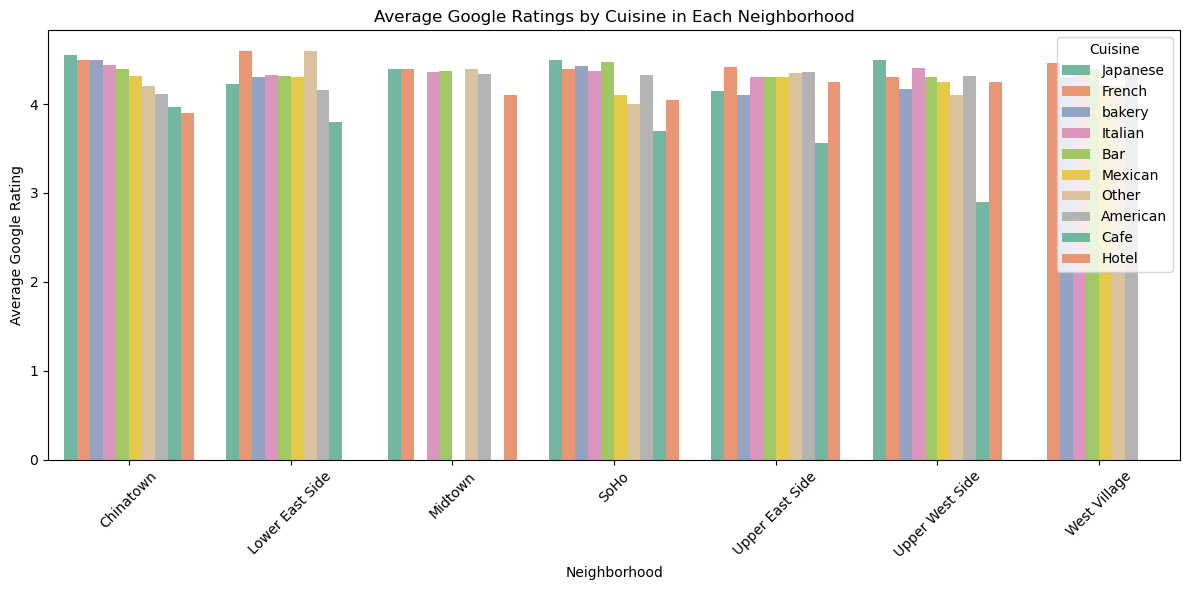

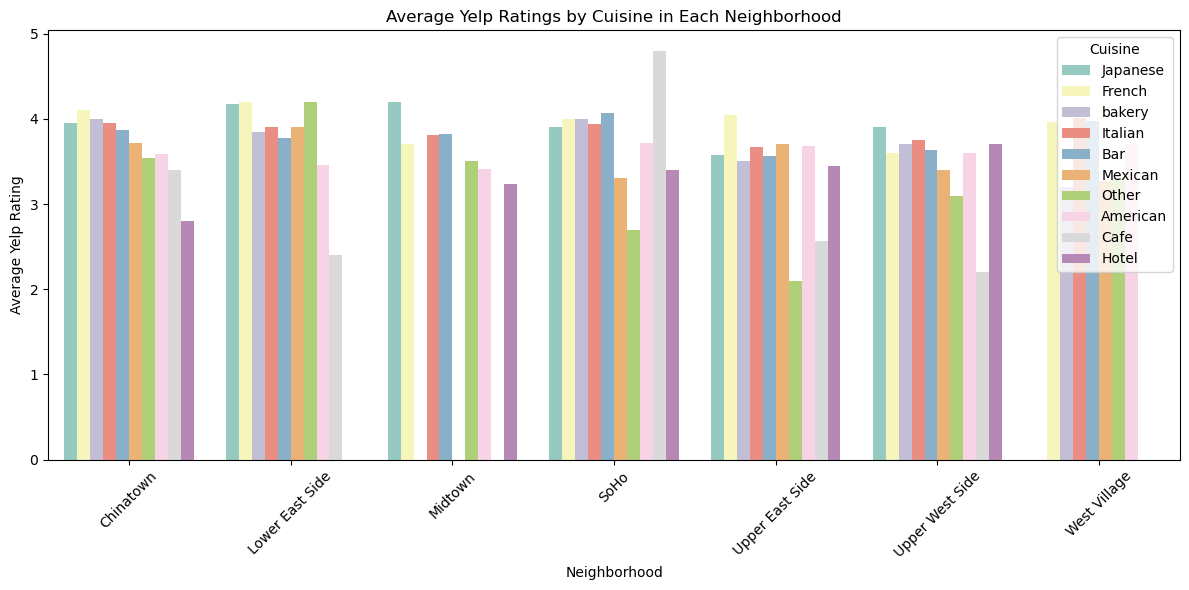

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 5 cuisines by average Google rating for simplicity
top_cuisines = cuisine_neighborhood_analysis_sorted["cuisine"].value_counts().head(10).index
filtered_data = cuisine_neighborhood_analysis_sorted[cuisine_neighborhood_analysis_sorted["cuisine"].isin(top_cuisines)]

# Google ratings
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_data,
    x="neighborhood",
    y="avg_rating_google",
    hue="cuisine",
    palette="Set2"
)
plt.title("Average Google Ratings by Cuisine in Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Google Rating")
plt.legend(title="Cuisine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yelp ratings
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_data,
    x="neighborhood",
    y="avg_rating_yelp",
    hue="cuisine",
    palette="Set3"
)
plt.title("Average Yelp Ratings by Cuisine in Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Yelp Rating")
plt.legend(title="Cuisine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


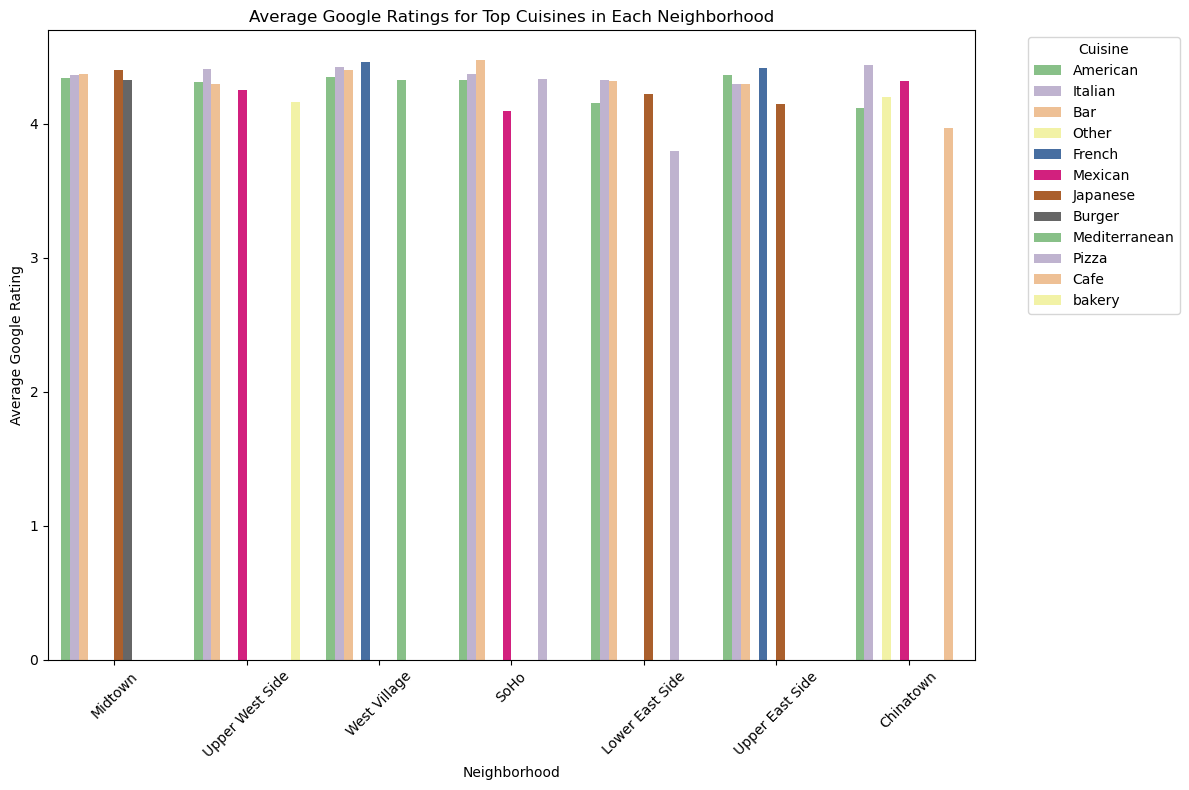

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cuisine_counts = restaurants_combined.groupby(["neighborhood", "cuisine"]).size().reset_index(name="count")

# Get the most common cuisine in each neighborhood
top_cuisines_by_neighborhood = (
    cuisine_counts.sort_values("count", ascending=False)
    .groupby("neighborhood")
    .head(5) 
    .reset_index(drop=True)
)

top_cuisine_data = pd.merge(
    top_cuisines_by_neighborhood,
    cuisine_neighborhood_analysis_sorted,
    on=["neighborhood", "cuisine"],
    how="inner"
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_cuisine_data,
    x="neighborhood",
    y="avg_rating_google",
    hue="cuisine",
    palette="Accent"
)
plt.title("Average Google Ratings for Top Cuisines in Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Google Rating")
plt.xticks(rotation=45)
plt.legend(title="Cuisine", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# does a certain cuisine do better in a certain location?

In [120]:
!pip install nltk

# Sentiment Analysis

In [169]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    sentiment = sia.polarity_scores(text)
    return sentiment["compound"]  

reviews_df["sentiment_score"] = reviews_df["review_text"].apply(analyze_sentiment_vader)

reviews_df.head()


,review_id,restaurant_id,review_text,review_rating,sentiment_score,sentiment_category,rating_google,rating_category
0,1,1,You know when people said “Try Artichoke Basil...,5,0.9275,Positive,4.4,High Rated
1,2,1,I had one artichoke pizza for lunch and a crab...,5,0.9730,Positive,4.4,High Rated
2,3,1,Second time visiting Artichoke Basille's Pizza...,5,0.5945,Positive,4.4,High Rated
3,4,1,Artichoke Pizza in Greenwich Village is a slic...,5,0.9931,Positive,4.4,High Rated
4,5,1,Best pizza in nyc.\n\nThis place has the most ...,5,0.8934,Positive,4.4,High Rated


In [160]:
# Summary statistics
print(reviews_df["sentiment_score"].describe())

reviews_df["sentiment_category"] = pd.cut(
    reviews_df["sentiment_score"],
    bins=[-1, -0.05, 0.05, 1],
    labels=["Negative", "Neutral", "Positive"]
)
print(reviews_df["sentiment_category"].value_counts())

count    1750.000000
mean        0.787775
std         0.412946
min        -0.991700
25%         0.839800
50%         0.947600
75%         0.976100
max         0.999200
Name: sentiment_score, dtype: float64
sentiment_category
Positive    1623
Negative     117
Neutral       10
Name: count, dtype: int64


neighborhood
Midtown            0.847466
West Village       0.822686
SoHo               0.817902
Upper West Side    0.799524
Chinatown          0.792912
Lower East Side    0.732559
Upper East Side    0.701377
Name: sentiment_score, dtype: float64


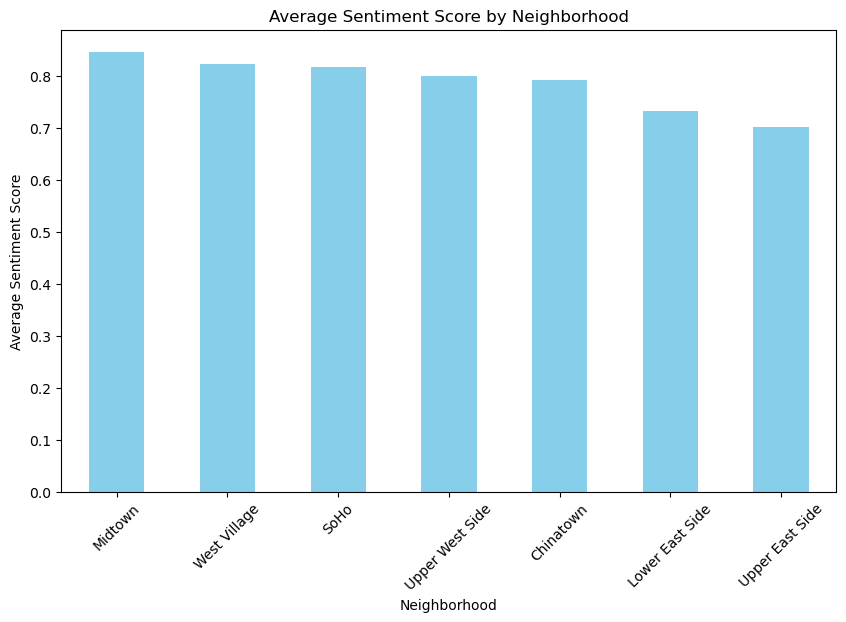

In [164]:

reviews_with_neighborhood = pd.merge(
    reviews_df,
    restaurants_df[["restaurant_id", "neighborhood"]],
    on="restaurant_id",
    how="left"
)

neighborhood_sentiment = reviews_with_neighborhood.groupby("neighborhood")["sentiment_score"].mean().sort_values(ascending=False)
print(neighborhood_sentiment)

neighborhood_sentiment.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Average Sentiment Score by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()


In [165]:
correlation = reviews_df["sentiment_score"].corr(reviews_df["review_rating"])
print(f"Correlation between sentiment score and review rating: {correlation}")

Correlation between sentiment score and review rating: 0.665438757949345


In [167]:
top_restaurants_sentiment = reviews_df.groupby("restaurant_id")["sentiment_score"].mean().reset_index()
top_restaurants_sentiment = pd.merge(
    top_restaurants_sentiment,
    restaurants_df[["restaurant_id", "restaurant_name"]],
    on="restaurant_id",
    how="left"
).sort_values("sentiment_score", ascending=False).head(10)

print(top_restaurants_sentiment)


     restaurant_id  sentiment_score                  restaurant_name
327            328          0.98452         Smoke Jazz & Supper Club
296            297          0.98376                        Bar Belly
123            124          0.98376                        Bar Belly
167            168          0.98376                Club A Steakhouse
248            249          0.98330             The Russian Tea Room
326            327          0.98106                    Rosa Mexicano
213            214          0.98058                 Keens Steakhouse
274            275          0.98056              Loreley Beer Garden
203            204          0.97908  Oohu Szechuan & Canton Cuisines
214            215          0.97800                  Pershing Square


rating_category
Low Rated     0.585443
High Rated    0.823081
Name: sentiment_score, dtype: float64


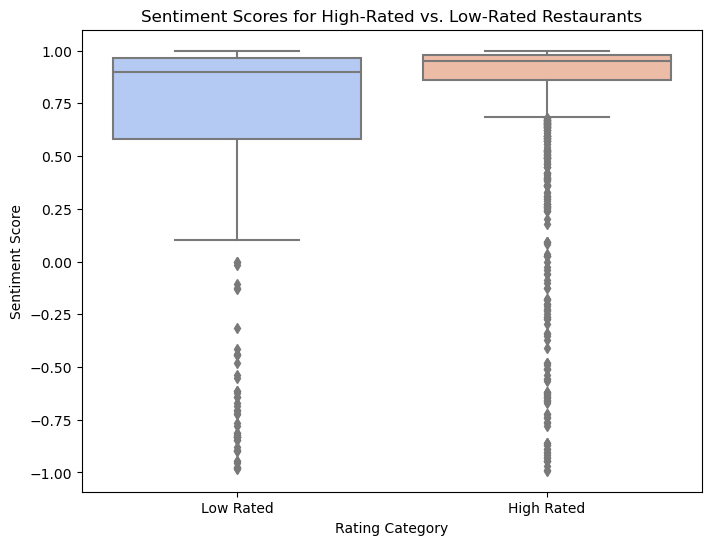

In [168]:
# Classify restaurants as High-Rated or Low-Rated based on Google ratings
reviews_df = pd.merge(
    reviews_df,
    restaurants_df[["restaurant_id", "rating_google"]],
    on="restaurant_id",
    how="left"
)

reviews_df["rating_category"] = pd.cut(
    reviews_df["rating_google"],
    bins=[0, 4.0, 5.0],
    labels=["Low Rated", "High Rated"]
)

# Compare average sentiment scores between High-Rated and Low-Rated restaurants
avg_sentiment_by_rating = reviews_df.groupby("rating_category")["sentiment_score"].mean()
print(avg_sentiment_by_rating)

# Box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="rating_category", y="sentiment_score", data=reviews_df, palette="coolwarm"
)
plt.title("Sentiment Scores for High-Rated vs. Low-Rated Restaurants")
plt.xlabel("Rating Category")
plt.ylabel("Sentiment Score")
plt.show()


# K-means Clustering Algorithm

In [197]:
import pandas as pd
from datetime import datetime

def calculate_daily_hours(row):
    try:
        opening = row["opening_hours"]
        closing = row["closing_hours"]  

        if closing < opening:
            daily_hours = (datetime.combine(datetime.min, closing) - datetime.combine(datetime.min, opening)).seconds / 3600 + 24
        else:
            daily_hours = (datetime.combine(datetime.min, closing) - datetime.combine(datetime.min, opening)).seconds / 3600
        return daily_hours
    except Exception as e:
        print(f"Error calculating daily hours for restaurant_id {row['restaurant_id']}: {e}")
        return 0


hours_df["daily_hours"] = hours_df.apply(calculate_daily_hours, axis=1)

weekly_hours = hours_df.groupby("restaurant_id")["daily_hours"].sum().reset_index()
weekly_hours.rename(columns={"daily_hours": "total_weekly_hours"}, inplace=True)


In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


restaurants_combined = restaurants_df.merge(weekly_hours, on="restaurant_id", how="left")

# Include sentiment score (average per restaurant)
avg_sentiment = reviews_df.groupby("restaurant_id")["sentiment_score"].mean().reset_index()
restaurants_combined = restaurants_combined.merge(avg_sentiment, on="restaurant_id", how="left")


label_encoder = LabelEncoder()
restaurants_combined["cuisine_encoded"] = label_encoder.fit_transform(restaurants_combined["cuisine"].fillna("Unknown"))


features = restaurants_combined[[
    "rating_google", "rating_yelp", "review_count_google", "review_count_yelp",
    "total_weekly_hours", "cuisine_encoded", "sentiment_score"
]].dropna()

imputer = SimpleImputer(strategy="mean")
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


/Users/aditisirohi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


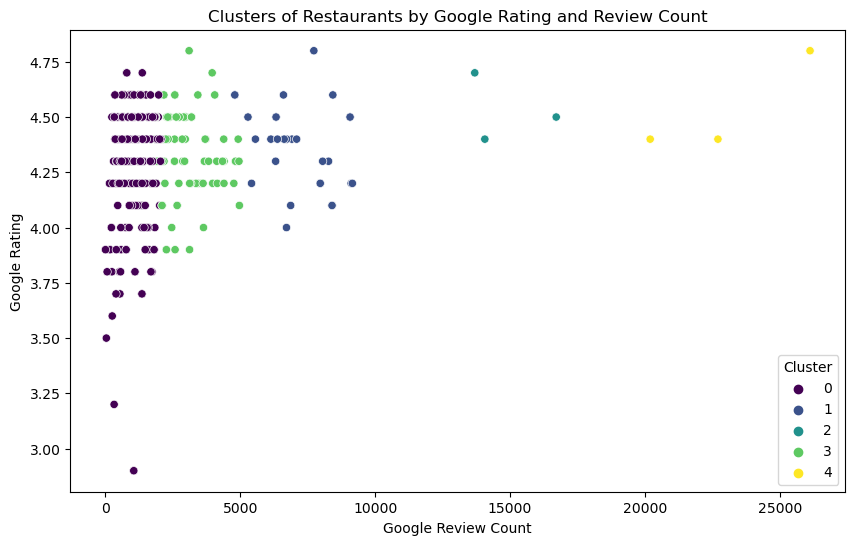

In [199]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
features_imputed["cluster"] = kmeans.fit_predict(features_imputed)


restaurants_combined["cluster"] = features_imputed["cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=features_imputed, x="review_count_google", y="rating_google", hue="cluster", palette="viridis"
)
plt.title("Clusters of Restaurants by Google Rating and Review Count")
plt.xlabel("Google Review Count")
plt.ylabel("Google Rating")
plt.legend(title="Cluster")
plt.show()


Cluster 0 (Purple): Concentrated at the lower review count and moderately low ratings (3.5 to 4.0). Likely represents underperforming or less popular restaurants.  
Cluster 1 (Blue): Spread across medium to high review counts and moderately high ratings (4.0+). Likely represents well-rated and somewhat popular restaurants.  
Cluster 2 (Green): Represents restaurants with lower review counts but relatively higher ratings (4.2+). These could be newer or niche restaurants that cater to a specific audience.  
Cluster 3 (Teal): High review counts (10,000 to 15,000) and consistent high ratings (4.2+). Likely very popular restaurants with a strong reputation.  
Cluster 4 (Yellow): Outliers with extremely high review counts (20,000+) and top-tier ratings (~4.7+). These are likely iconic or flagship restaurants.  

In [200]:
# Analyze cluster averages
cluster_analysis = restaurants_combined.groupby("cluster").agg({
    "rating_google": "mean",
    "rating_yelp": "mean",
    "review_count_google": "mean",
    "review_count_yelp": "mean",
    "total_weekly_hours": "mean",
    "sentiment_score": "mean",
}).reset_index()

print(cluster_analysis)


   cluster  rating_google  rating_yelp  review_count_google  \
0      0.0       4.273973     3.671233          1862.671233   
1      1.0       4.277419     3.638710          3281.129032   
2      2.0       4.466667     3.933333          5123.666667   
3      3.0       4.332530     3.744578          2930.096386   
4      4.0       4.433333     3.900000         13154.666667   

   review_count_yelp  total_weekly_hours  sentiment_score  
0        1014.438356          137.325188         0.765910  
1        1614.870968          147.612778         0.819037  
2         766.000000          120.666667         0.953600  
3        1288.506024          141.402547         0.814410  
4        3564.000000          148.500000         0.883233  


/Users/aditisirohi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


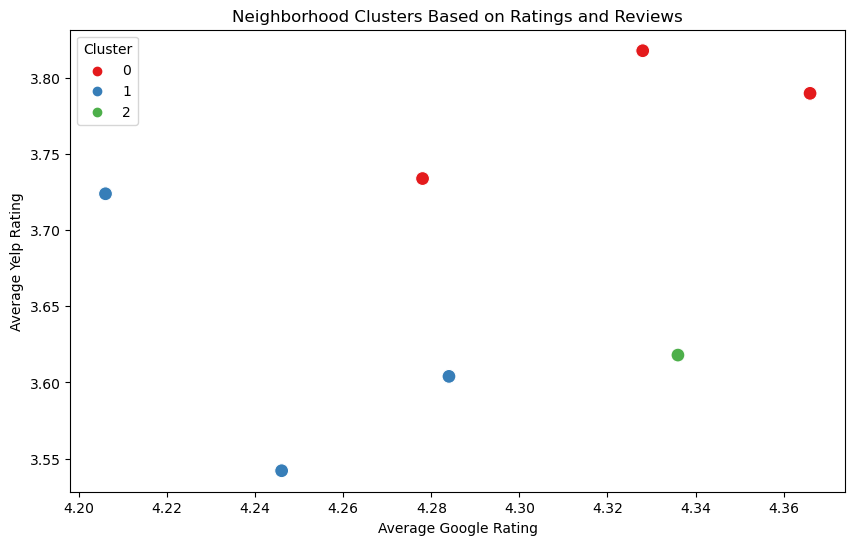

      neighborhood  avg_rating_google  avg_rating_yelp  total_reviews  \
0        Chinatown              4.278            3.734         102125   
3             SoHo              4.328            3.818         121327   
6     West Village              4.366            3.790         109522   
1  Lower East Side              4.206            3.724          65730   
4  Upper East Side              4.246            3.542          79361   
5  Upper West Side              4.284            3.604          92592   
2          Midtown              4.336            3.618         251366   

   combined_rating  cluster  
0            4.006        0  
3            4.073        0  
6            4.078        0  
1            3.965        1  
4            3.894        1  
5            3.944        1  
2            3.977        2  


In [201]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate metrics for each neighborhood
neighborhood_metrics = restaurants_df.groupby("neighborhood").agg(
    avg_rating_google=("rating_google", "mean"),
    avg_rating_yelp=("rating_yelp", "mean"),
    total_reviews=("review_count_google", "sum")
).reset_index()


neighborhood_metrics["combined_rating"] = (neighborhood_metrics["avg_rating_google"] + neighborhood_metrics["avg_rating_yelp"]) / 2


features = neighborhood_metrics[["avg_rating_google", "avg_rating_yelp", "total_reviews"]]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
neighborhood_metrics["cluster"] = kmeans.fit_predict(features_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=neighborhood_metrics,
    x="avg_rating_google", y="avg_rating_yelp",
    hue="cluster", palette="Set1", s=100
)
plt.title("Neighborhood Clusters Based on Ratings and Reviews")
plt.xlabel("Average Google Rating")
plt.ylabel("Average Yelp Rating")
plt.legend(title="Cluster")
plt.show()

print(neighborhood_metrics.sort_values("cluster"))


Cluster 0 (Red):  
This cluster has neighborhoods with the highest average Google ratings (4.32) and moderately high Yelp ratings (3.8).  
These neighborhoods likely have restaurants that are well-received by customers across platforms, potentially indicating high-quality dining options or strong customer satisfaction.  

Cluster 1 (Blue):  
Neighborhoods in this cluster have moderate Google ratings (4.24) but lower Yelp ratings (3.55-3.65).  
This suggests a discrepancy in perceptions between the two platforms. Possible reasons could include differences in user bases or Yelp users being more critical in these neighborhoods.  

Cluster 2 (Green):  
Neighborhoods in this cluster have relatively high Google ratings (4.34) but slightly lower Yelp ratings (3.6).  
These neighborhoods might have restaurants that attract Google reviewers more favorably compared to Yelp.
